mean 25.9274609375
varience 1045.7242693344115


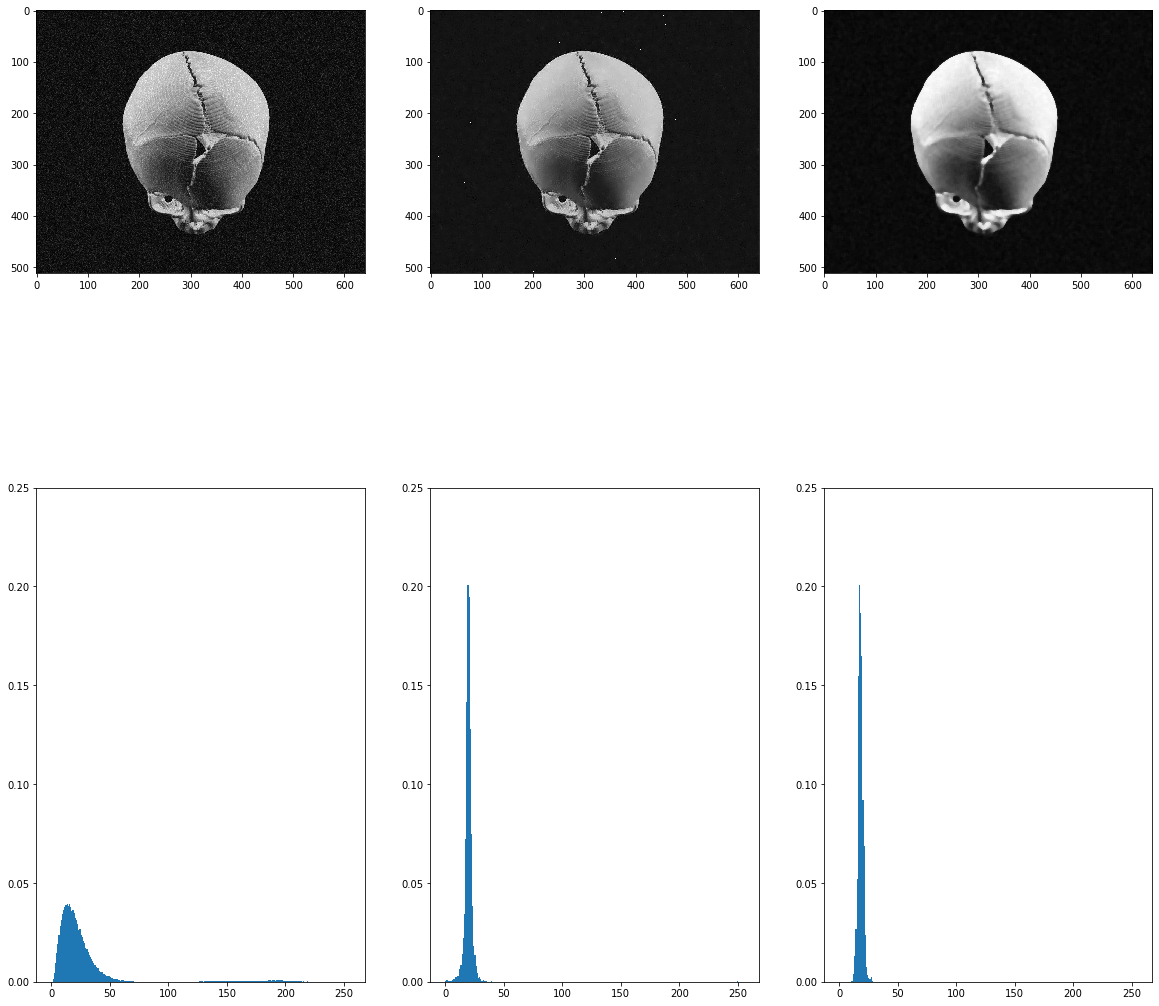

In [11]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


img = cv.imread('noisy_skull.png',0)
img1 = img[0:600,0:200]

plt.figure(figsize=(20,20))
plt.subplot(2,3,1)
plt.imshow(img, cmap='gray')

plt.subplot(2,3,4)
plt.hist(img1.ravel(), bins = 256 , range = (0,255) , density = True ,stacked = True)
plt.ylim(0, 0.25)

mean = img1.mean()
varience = img1.var()
print('mean',mean)
print('varience',varience)



padding_img = cv.copyMakeBorder(img, 4, 4, 4, 4 , cv.BORDER_REPLICATE) 

adaptive_filtred_img=np.zeros(img.shape , dtype='float64')

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        window = padding_img[i:i+9 , j:j+9]
        local_var=window.var()
        local_mean=window.mean()
        adaptive_filtred_img[i,j] = img[i,j] - (variance/local_var)*(img[i,j]-local_mean)

adaptive_filtred_img = np.array(adaptive_filtred_img , dtype='uint8')
plt.subplot(2,3,2)
plt.imshow(adaptive_filtred_img , cmap='gray')


adaptive_filtred_img1 = adaptive_filtred_img[0:500,0:10]
plt.subplot(2,3,5)
plt.hist(adaptive_filtred_img1.ravel(), bins = 256 , range = (0,255) , density = True , stacked = True)
plt.ylim(0, 0.25)

median_filtred_img = cv.medianBlur(img,7)
plt.subplot(2,3,3)
plt.imshow(median_filtred_img , cmap='gray')


median_filtred_img1 = median_filtred_img[0:500,0:10]
plt.subplot(2,3,6)
plt.hist(median_filtred_img1.ravel(), bins = 256 , range = (0,255) , density = True , stacked = True)
plt.ylim(0, 0.25)

#cv.imshow('img',img)
#cv.imshow('adaptive',adaptive_filtred_img)
#cv.imshow('median',median_filtred_img)
plt.show()
cv.waitKey(0)
cv.destroyAllWindows()

